# Survery Analysis

In this notebook we'll be analyzing George's survey data to see if there's anything meaningful in here.

[Happiness vs Income](#Happiness vs Income)

[Rest of Data](#Rest of Data)


## Happiness vs Income
<a id='Happiness vs Income'></a>

In [1]:
import numpy as np#Math library
import pandas as pd#Table library
import matplotlib.pyplot as plt#Plotting library
import pandas as pd
import warnings
import seaborn as sns#Plotting library
warnings.filterwarnings('ignore')#Gets rid of popup warnings
%matplotlib nbagg

In [31]:
xls = pd.read_csv('george_sheet3.csv')
xls.head()

,Yearly earning's range,"How happy are you with your life? (1 = REALLY SAD, 10 = REALLY HAPPY)",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,70,7,NaN,NaN,NaN,NaN,NaN
1,35,9,NaN,NaN,NaN,NaN,NaN
2,70,8,NaN,NaN,NaN,NaN,NaN
3,100,8,NaN,NaN,NaN,NaN,NaN
4,35,8,NaN,NaN,NaN,NaN,NaN


In [3]:
xls.columns= ['annual_earnings','happiness_score','none','none','none',
              'none','none']

<IPython.core.display.Javascript object>


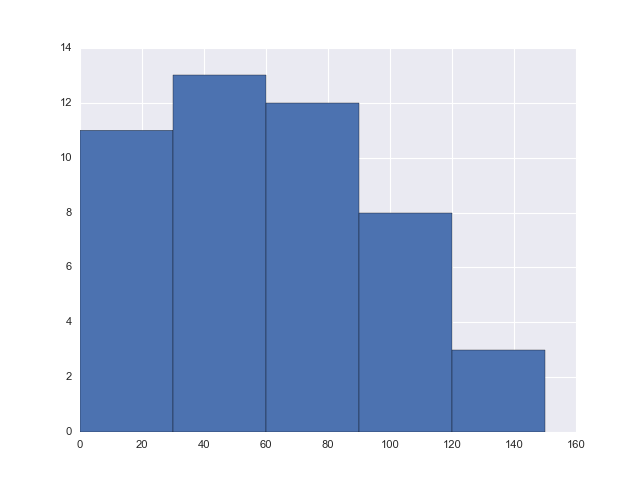

In [4]:
xls['annual_earnings'].hist(bins= 5)

<IPython.core.display.Javascript object>


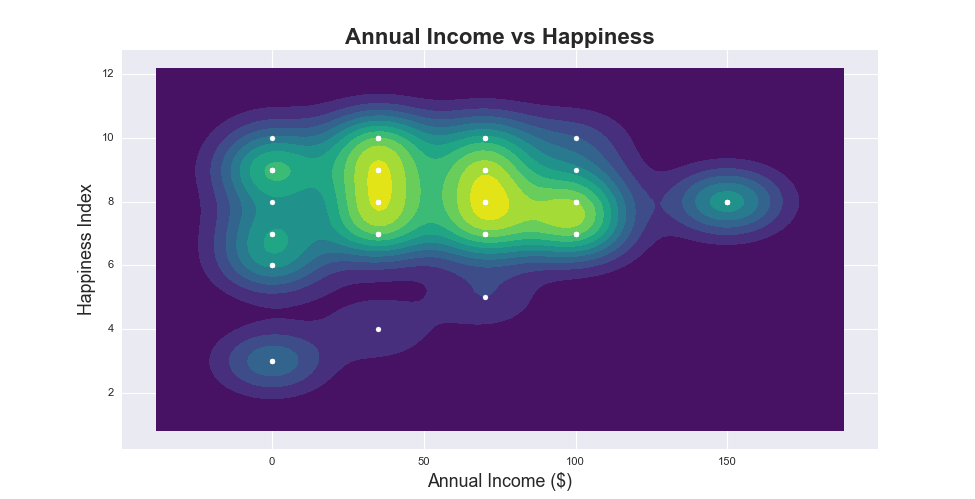

In [30]:
sns.kdeplot(xls['annual_earnings'],xls['happiness_score'], shade=True, cmap='viridis')
plt.scatter(xls['annual_earnings'],xls['happiness_score'], color= 'white')
plt.xlabel('Annual Income ($)', fontsize= 16)
plt.ylabel('Happiness Index', fontsize= 16)
plt.title('Annual Income vs Happiness', fontsize= 20, fontweight= 'bold')
#plt.colorbar(orientation='horizontal', shrink=0.8)

## Rest of Data

<a id='Rest of Data'></a>

The remaining data from a separate sheet of the table is more categorical in nature. We'll try to one-hot encode it since the answers repeat themselves so often. We'll start by relabeling the columns to make the table easier to read.

In [42]:
xls2 = pd.read_csv('george_summarized.csv', header=0)
xls2.head()

,Timestamp,Do you make new year's resolutions?,Do you usually tell others your new year's resolutions?,Do you usually accomplish your new year's resolutions?,Do you use to-do lists?,"If so, what kind",Do you usually tell someone else your goals or tasks for the week?,Do you usually complete the items on your to-do lists?,"Do you ever make bets for achieving goals and developing better habits? (E.g. ""I bet you $100 I will lose 10 lbs this year"", or ""I bet you $10 I will go jogging twice this week"")","How much money do you make annually? (Before taxes, USD)","How happy are you with your life? (1 = REALLY SAD, 10 = REALLY HAPPY)",How old are you?,What is your Gender?
0,2016/06/25 3:51:39 PM MDT,Yes,Yes,Yes,Yes,email to self,Yes,Yes,"Yes, about once a month",$70k to $100k,7.0,26 to 35,Male
1,2016/06/25 5:58:49 PM MDT,Yes,No,No,Yes,app,No,Yes,"Yes, about once a year",$35k to $70k,9.0,26 to 35,Male
2,2016/06/25 6:06:20 PM MDT,No,No,No,Yes,paper,Yes,Yes,No,$70k to $100k,8.0,26 to 35,Female
3,2016/06/25 6:23:15 PM MDT,Yes,Yes,Yes,Yes,paper,No,Yes,No,$100k to $150k,8.0,26 to 35,Female
4,2016/06/25 7:51:28 PM MDT,No,No,No,Yes,paper,No,Yes,No,$35k to $70k,8.0,26 to 35,Female


In [48]:
xls2Simple= xls2.copy()
xls2Simple.columns= ['datetime','make_res','share_res','achieve_res','todo_list','todo_kind','todo_share',
                     'todo_complete', 'bet','salary','happiness','age_bin','gender']
xls2Simple.head(5)

,datetime,make_res,share_res,achieve_res,todo_list,todo_kind,todo_share,todo_complete,bet,salary,happiness,age_bin,gender
0,2016/06/25 3:51:39 PM MDT,Yes,Yes,Yes,Yes,email to self,Yes,Yes,"Yes, about once a month",$70k to $100k,7.0,26 to 35,Male
1,2016/06/25 5:58:49 PM MDT,Yes,No,No,Yes,app,No,Yes,"Yes, about once a year",$35k to $70k,9.0,26 to 35,Male
2,2016/06/25 6:06:20 PM MDT,No,No,No,Yes,paper,Yes,Yes,No,$70k to $100k,8.0,26 to 35,Female
3,2016/06/25 6:23:15 PM MDT,Yes,Yes,Yes,Yes,paper,No,Yes,No,$100k to $150k,8.0,26 to 35,Female
4,2016/06/25 7:51:28 PM MDT,No,No,No,Yes,paper,No,Yes,No,$35k to $70k,8.0,26 to 35,Female


In [63]:
#We need to modify a copy of our table, then get rid of datetime since it has too many values to one-hot encode
#though we could add it back in later if we wanted to
xls2Hotcode= xls2Simple.copy()
xls2Hotcode= xls2Hotcode.drop('datetime', axis=1)
xls2Hotcode.head()

,make_res,share_res,achieve_res,todo_list,todo_kind,todo_share,todo_complete,bet,salary,happiness,age_bin,gender
0,Yes,Yes,Yes,Yes,email to self,Yes,Yes,"Yes, about once a month",$70k to $100k,7.0,26 to 35,Male
1,Yes,No,No,Yes,app,No,Yes,"Yes, about once a year",$35k to $70k,9.0,26 to 35,Male
2,No,No,No,Yes,paper,Yes,Yes,No,$70k to $100k,8.0,26 to 35,Female
3,Yes,Yes,Yes,Yes,paper,No,Yes,No,$100k to $150k,8.0,26 to 35,Female
4,No,No,No,Yes,paper,No,Yes,No,$35k to $70k,8.0,26 to 35,Female


The code bellow will one-hot encode all of the columns since we basically only have categorical data. This will generate a lot more features, but it will allows us to make proportions and sums to understand the breakdown of the data in our group.

In [95]:
columns= xls2Hotcode.columns

for i in range(0, len(columns)):
    
    for elem in xls2Hotcode[columns[i]].unique():
        xls2Hotcode[str(elem)] = xls2Hotcode[columns[i]] == elem
xls2Hotcode.head(3)

,make_res,share_res,achieve_res,todo_list,todo_kind,todo_share,todo_complete,bet,salary,happiness,...,46 to 65,Greater than 65,35 to 45,18 to 25,45 to 65,25 to 35,Male,Female,True,False
0,Yes,Yes,Yes,Yes,email to self,Yes,Yes,"Yes, about once a month",$70k to $100k,7.0,...,False,False,False,False,False,False,True,False,True,False
1,Yes,No,No,Yes,app,No,Yes,"Yes, about once a year",$35k to $70k,9.0,...,False,False,False,False,False,False,True,False,True,False
2,No,No,No,Yes,paper,Yes,Yes,No,$70k to $100k,8.0,...,False,False,False,False,False,False,False,True,False,True


In [104]:
#Now we'll get rid of the original columns since there will be overlap in the answers
xls2Hotcodeclean= xls2Hotcode.copy()
xls2Hotcodeclean= xls2Hotcodeclean[xls2Hotcodeclean.columns[12:]]

In [105]:
xls2Hotcodeclean.head(5)

,Yes,No,nan,email to self,app,paper,"paper, app","paper, email to self, app","email to self, app",paper,...,46 to 65,Greater than 65,35 to 45,18 to 25,45 to 65,25 to 35,Male,Female,True,False
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,True,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,True,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,True,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,True,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [93]:
xls2Sums= xls2Hotcodeclean.sum()
xls2Sums

Yes                          40
No                           39
nan                           0
email to self                 4
app                          17
paper                        19
paper, app                    4
paper, email to self, app     2
email to self, app            3
 paper                        1
Yes, about once a month       2
Yes, about once a year       10
No, but I would               1
every 5 years                 1
$70k to $100k                12
$35k to $70k                 14
$100k to $150k                8
0 to $35k                    11
Greater than $150k            3
7.0                          13
9.0                          10
8.0                          15
10.0                          7
6.0                           2
4.0                           1
5.0                           1
3.0                           2
26 to 35                     23
19 to 25                      2
36 to 45                      2
46 to 65                      3
Greater 

Ok so python is unfortunately consolidating the Yes and No columns from multiple questions (old columns) together so we'll need to split them up somehow to correct this (we have 50ish columns but you can see that the sum of Yes and No are ~ 79 which doesn't make sense.

Some initial insights: 

    *Male:female ratio is about 60:40
    
    *Respondents are pretty happy in general (most scores are between 7 and 10)

In [106]:
xls2Hotcodeclean.columns

Index([u'Yes', u'No', u'nan', u'email to self', u'app', u'paper',
       u'paper, app', u'paper, email to self, app', u'email to self, app',
       u' paper', u'Yes, about once a month', u'Yes, about once a year',
       u'No, but I would', u'every 5 years', u'$70k to $100k', u'$35k to $70k',
       u'$100k to $150k', u'0 to $35k', u'Greater than $150k', u'7.0', u'9.0',
       u'8.0', u'10.0', u'6.0', u'4.0', u'5.0', u'3.0', u'26 to 35',
       u'19 to 25', u'36 to 45', u'46 to 65', u'Greater than 65', u'35 to 45',
       u'18 to 25', u'45 to 65', u'25 to 35', u'Male', u'Female', u'True',
       u'False'],
      dtype='object')

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>

## Formatting Data

<a id='Formatting Data'></a>